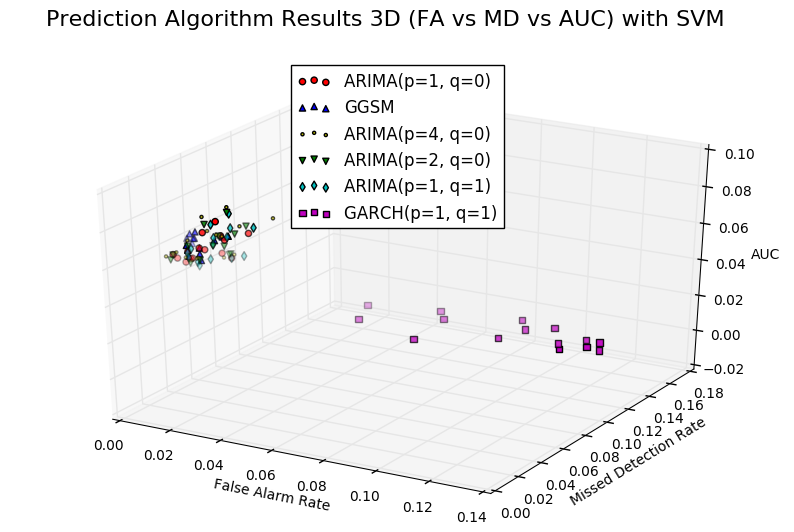

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

r = [
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0906133308914, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.475, FA=0.0294627383016, MD=0.0294627383016',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0878682817306, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.025, FA=0.0294627383016, MD=0.0294627383016',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0867083659772, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.225, FA=0.0294117647059, MD=0.0311418685121',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0857929463699, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.475, FA=0.0227074235808, MD=0.0235807860262',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0833701140642, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.475, FA=0.040765391015, MD=0.0424292845258',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0830463220157, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=2.925, FA=0.0261551874455, MD=0.027027027027',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0820171510419, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0235602094241, MD=0.0235602094241',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0817877940131, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.375, FA=0.0252173913043, MD=0.0252173913043',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0805766072802, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.525, FA=0.0329113924051, MD=0.0320675105485',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0799882082075, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.075, FA=0.0370682392586, MD=0.0345408593092',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.079053389201, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.425, FA=0.0296610169492, MD=0.0313559322034',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0790321836885, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.075, FA=0.0329113924051, MD=0.0371308016878',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0777842475639, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.825, FA=0.0233766233766, MD=0.025974025974',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0775319003341, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0227074235808, MD=0.0235807860262',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0763519171369, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.325, FA=0.0313028764805, MD=0.0313028764805',
 'Model=GGSM, ROC AUC=0.0763366227384, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=2.725, FA=0.0307692307692, MD=0.0273504273504',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0763162721635, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.275, FA=0.0265486725664, MD=0.0265486725664',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0761389949308, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=2.825, FA=0.0345991561181, MD=0.0354430379747',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0760594715857, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.625, FA=0.0288379983036, MD=0.0262934690416',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0754454537514, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.025, FA=0.027360988526, MD=0.0282436010591',
 'Model=GGSM, ROC AUC=0.0752652205027, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=2.575, FA=0.0175746924429, MD=0.0281195079086',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0750890907503, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.125, FA=0.0265017667845, MD=0.0282685512367',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0745768189362, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.175, FA=0.0290237467018, MD=0.0299032541777',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0744821095314, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.625, FA=0.0255319148936, MD=0.0263829787234',
 'Model=GGSM, ROC AUC=0.0743045328363, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.525, FA=0.0272340425532, MD=0.0297872340426',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0736934432913, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.475, FA=0.0187667560322, MD=0.0196604110813',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0735828369977, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.275, FA=0.0289361702128, MD=0.028085106383',
 'Model=GGSM, ROC AUC=0.0734941916325, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=2.575, FA=0.0151921358356, MD=0.0285969615728',
 'Model=GGSM, ROC AUC=0.0733288384387, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.475, FA=0.0260416666667, MD=0.0260416666667',
 'Model=GGSM, ROC AUC=0.072162922707, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=2.725, FA=0.0196956132498, MD=0.0170098478066',
 'Model=GGSM, ROC AUC=0.0716916089979, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.575, FA=0.0171379605827, MD=0.0282776349614',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0714637642211, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.675, FA=0.0259291270527, MD=0.0250648228176',
 'Model=GGSM, ROC AUC=0.0711799992079, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=2.575, FA=0.0163043478261, MD=0.0289855072464',
 'Model=GGSM, ROC AUC=0.0708184445307, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.575, FA=0.0139494333043, MD=0.0287707061901',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0707179108912, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.325, FA=0.0187667560322, MD=0.0196604110813',
 'Model=GGSM, ROC AUC=0.0704294949108, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.525, FA=0.0229885057471, MD=0.0203359858532',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0702758107198, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.575, FA=0.0287891617273, MD=0.0279424216765',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0701017913013, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.675, FA=0.0250431778929, MD=0.0267702936097',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0699035291008, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.625, FA=0.0223175965665, MD=0.0214592274678',
 'Model=GGSM, ROC AUC=0.0695923816305, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=2.725, FA=0.0199818346957, MD=0.0172570390554',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0691904133442, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.425, FA=0.0196253345227, MD=0.0205173951829',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0686614344345, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.675, FA=0.0234375, MD=0.0234375',
 'Model=GGSM, ROC AUC=0.0681975118892, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=2.575, FA=0.015639374425, MD=0.0294388224471',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0678084534487, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.225, FA=0.0187667560322, MD=0.0196604110813',
 'Model=GGSM, ROC AUC=0.0675804941409, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.525, FA=0.0233393177738, MD=0.0197486535009',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0670969417215, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.675, FA=0.0151921358356, MD=0.017873100983',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0670367225751, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.675, FA=0.0186666666667, MD=0.0195555555556',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0667416060489, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.475, FA=0.0152329749104, MD=0.0152329749104',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0665485631114, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.475, FA=0.0152329749104, MD=0.0152329749104',
 'Model=GGSM, ROC AUC=0.0663690345121, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=2.725, FA=0.0202764976959, MD=0.0175115207373',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0658818462955, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.675, FA=0.0272727272727, MD=0.0290909090909',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0656456391237, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.725, FA=0.0298642533937, MD=0.0307692307692',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0653853193893, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.475, FA=0.0127737226277, MD=0.014598540146',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0652443569091, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.225, FA=0.0294380017841, MD=0.0303300624442',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0651569826367, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.975, FA=0.0307136404697, MD=0.0316169828365',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0647955476285, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.825, FA=0.0219981668194, MD=0.0210815765353',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0646729263083, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.375, FA=0.0181653042688, MD=0.0190735694823',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0644565368976, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.575, FA=0.0202205882353, MD=0.0202205882353',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0641792056014, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.975, FA=0.0332434860737, MD=0.0341419586703',
 'Model=GGSM, ROC AUC=0.064093877551, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.525, FA=0.023679417122, MD=0.0200364298725',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.064020861678, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.825, FA=0.0182982616651, MD=0.0210430009149',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0640001900813, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.675, FA=0.0154125113327, MD=0.0181323662738',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0639513497531, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.575, FA=0.0145719489982, MD=0.0145719489982',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0638421768707, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.825, FA=0.02096627165, MD=0.0218778486782',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0636533275243, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.225, FA=0.030303030303, MD=0.030303030303',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0635934670128, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.325, FA=0.030303030303, MD=0.030303030303',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0635410430839, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.775, FA=0.0191956124314, MD=0.0210237659963',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0635223545255, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.425, FA=0.0277280858676, MD=0.0295169946333',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0634693877551, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.775, FA=0.0227686703097, MD=0.0209471766849',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0633794094332, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.675, FA=0.021978021978, MD=0.021978021978',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0632069222413, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.825, FA=0.024567788899, MD=0.0254777070064',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0622868185674, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.825, FA=0.0215439856373, MD=0.0215439856373',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0622347810609, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.375, FA=0.0181653042688, MD=0.0190735694823',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0620541117836, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.325, FA=0.0199456029012, MD=0.0190389845875',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0600845496618, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.675, FA=0.0216411181244, MD=0.0225428313796',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00642455064377, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=1.025, FA=0.125841184388, MD=0.132570659489',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00629203104432, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=1.325, FA=0.12406779661, MD=0.124745762712',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00591702148919, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=1.725, FA=0.116918844567, MD=0.116918844567',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00417756207415, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=1.025, FA=0.103042876902, MD=0.1459197787',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00322190019992, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=1.025, FA=0.11760707002, MD=0.140040788579',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00252819333712, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=1.025, FA=0.126436781609, MD=0.131169709263',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00246642248728, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=1.025, FA=0.110721793973, MD=0.131044148563',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00218796401432, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=1.025, FA=0.0872959545777, MD=0.153300212917',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00210230649107, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=1.025, FA=0.093105899076, MD=0.142146410803',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00182403628118, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=1.025, FA=0.0647198105762, MD=0.106550907656',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00144848973385, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=1.025, FA=0.0889705882353, MD=0.127205882353',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000964519369601, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=1.025, FA=0.0565184626978, MD=0.149208741522',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000804111783553, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=1.025, FA=0.0617469879518, MD=0.140060240964',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000190836893175, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=1.025, FA=0.0354838709677, MD=0.122580645161',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000184696374011, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=1.025, FA=0.030303030303, MD=0.141945773525',
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 7:
        algorithm = toks[0].replace('Model=', '')
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 7:
        algorithm_results[algorithm].append([float(toks[1].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[5:]))
    else:
        algorithm_results[algorithm].append([float(toks[2].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[6:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 3D (FA vs MD vs AUC) with SVM', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    z = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, z, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper center')

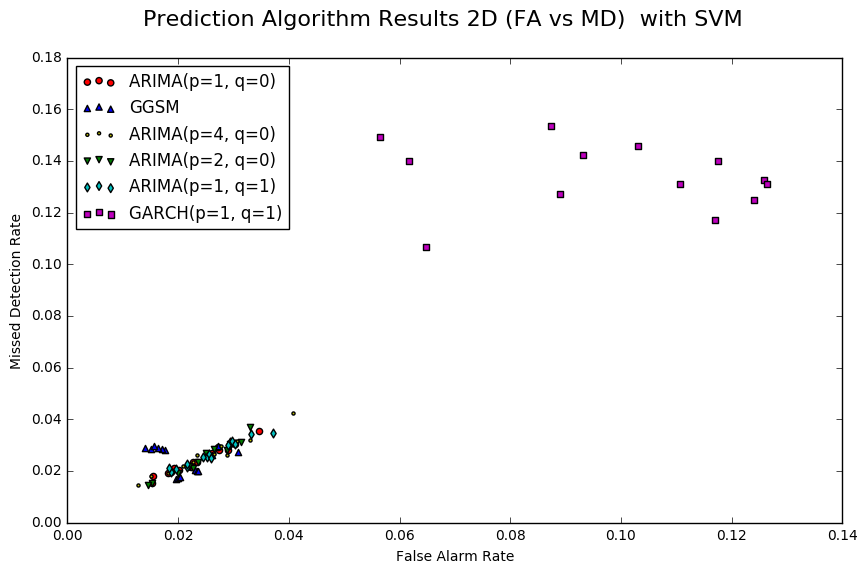

In [2]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 2D (FA vs MD)  with SVM', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

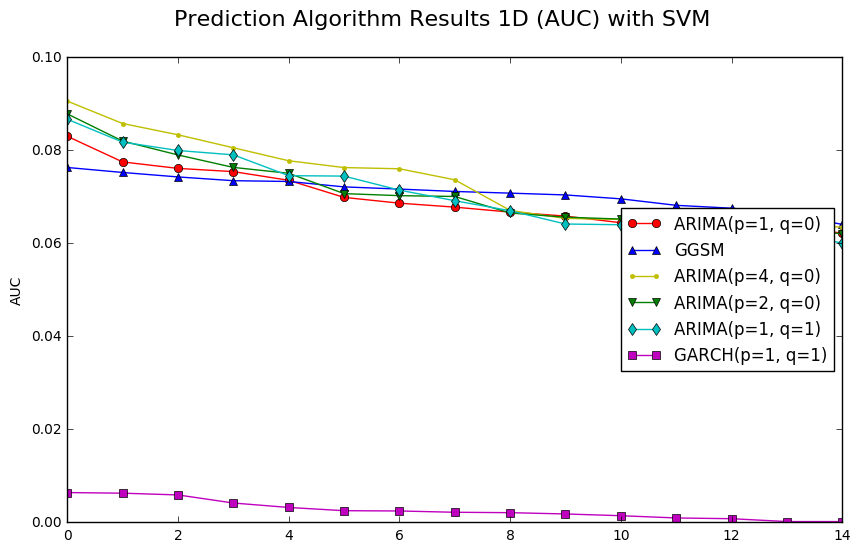

In [3]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 1D (AUC) with SVM', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='center right')

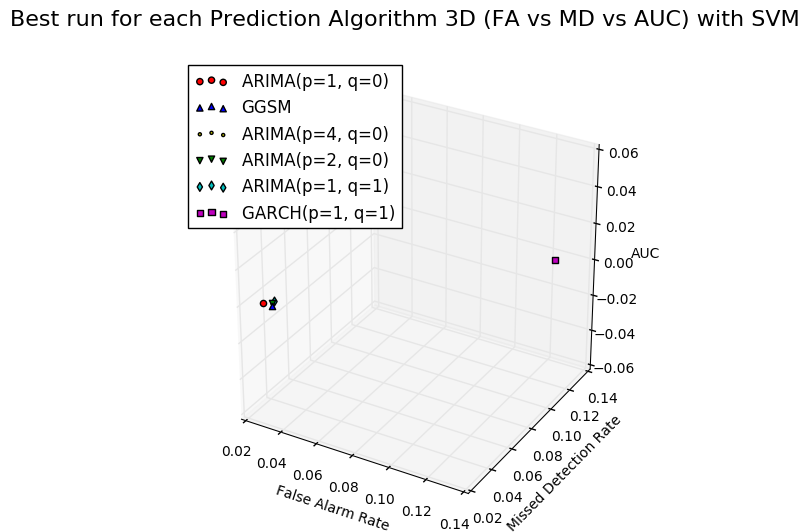

In [4]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 3D (FA vs MD vs AUC) with SVM', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    z = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

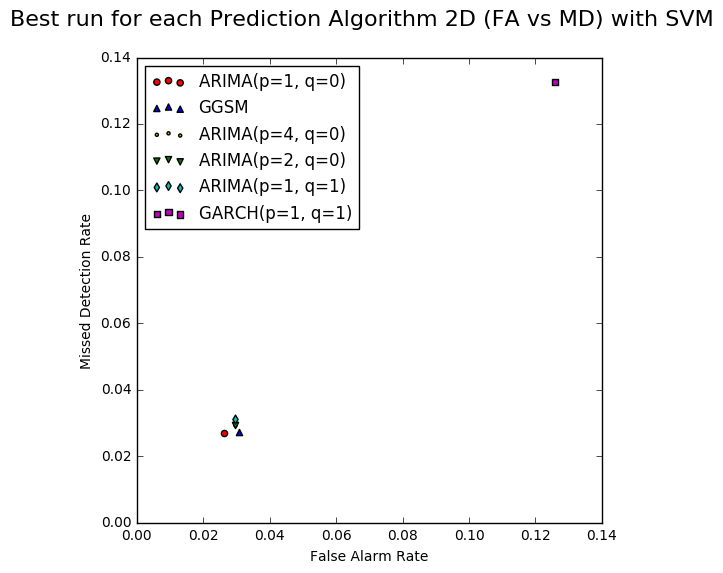

In [5]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 2D (FA vs MD) with SVM', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

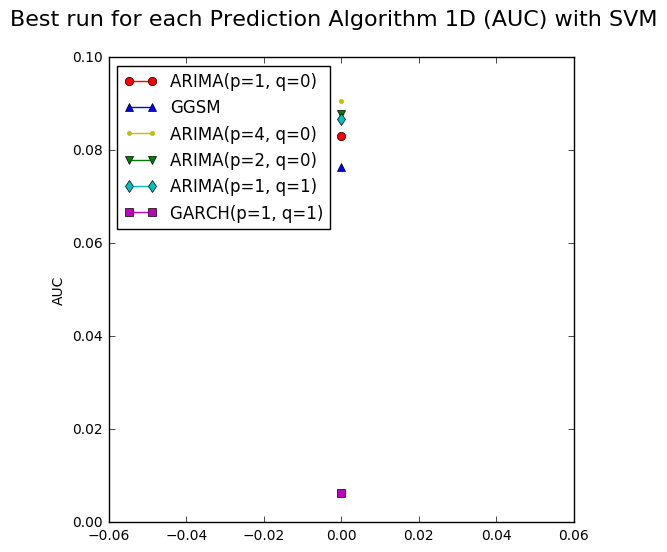

In [6]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 1D (AUC) with SVM', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

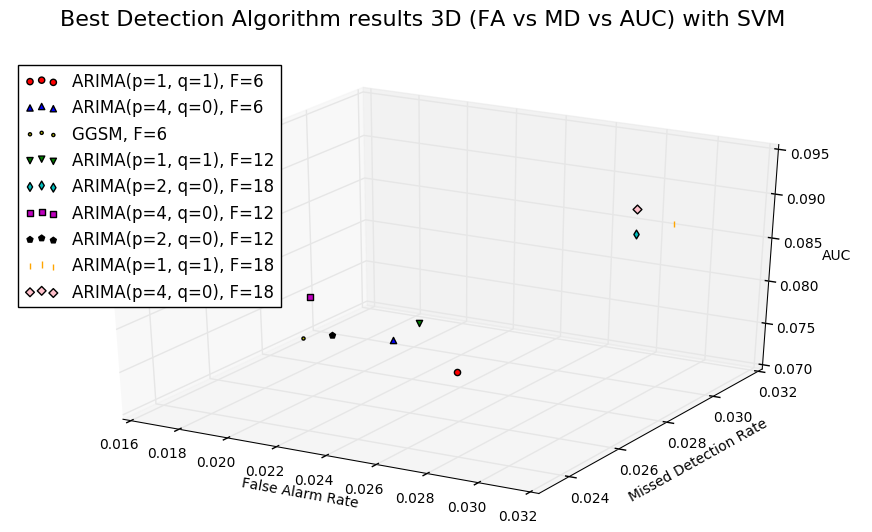

In [7]:
r = [
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0906133308914, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.475, FA=0.0294627383016, MD=0.0294627383016',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0878682817306, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.025, FA=0.0294627383016, MD=0.0294627383016',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0867083659772, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.225, FA=0.0294117647059, MD=0.0311418685121',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0857929463699, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.475, FA=0.0227074235808, MD=0.0235807860262',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0820171510419, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0235602094241, MD=0.0235602094241',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0817877940131, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.375, FA=0.0252173913043, MD=0.0252173913043',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0777842475639, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.825, FA=0.0233766233766, MD=0.025974025974',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0744821095314, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.625, FA=0.0255319148936, MD=0.0263829787234',
 'Model=GGSM, ROC AUC=0.0716916089979, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.575, FA=0.0171379605827, MD=0.0282776349614',
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 7:
        algorithm = toks[0].replace('Model=', '')+ ', F=' + toks[3].split('=')[1]
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1] + ', F=' + toks[4].split('=')[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        

    if len(toks) == 7:
        algorithm_results[algorithm].append([float(toks[1].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[5:]))
    else:
        algorithm_results[algorithm].append([float(toks[2].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[6:]))

fig = plt.figure(figsize=(11, 6))
fig.suptitle('Best Detection Algorithm results 3D (FA vs MD vs AUC) with SVM', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p'), ('#FFA500', '|'), ('#FFC0CB', 'D')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    z = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, z, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

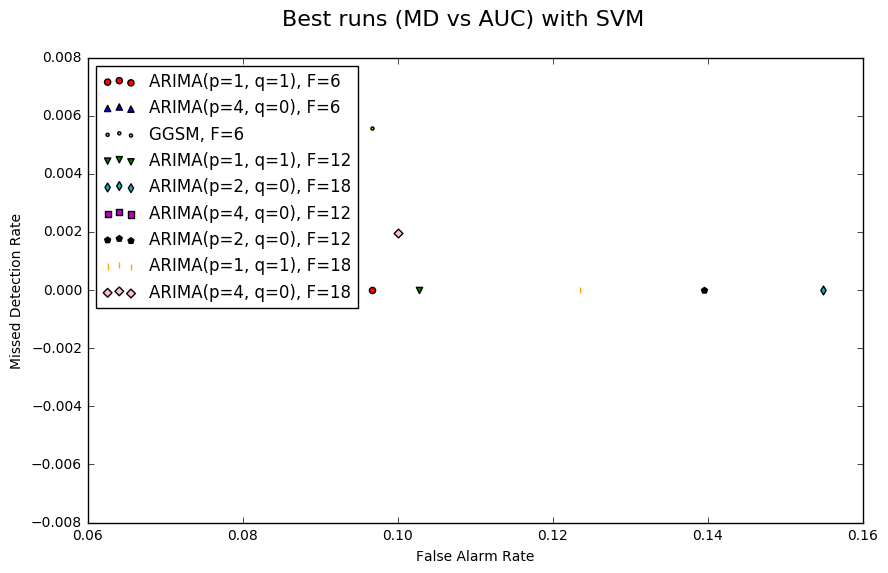

In [8]:
r = [
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.825, FA=0.0651340996169, MD=0.00574712643678',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.475, FA=0.0891472868217, MD=0.00193798449612',
 'Model=ARIMA(p=1, q=1), Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.625, FA=0.0966542750929, MD=0.0',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.475, FA=0.1, MD=0.00196078431373',
 'Model=GGSM, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.575, FA=0.0966542750929, MD=0.00557620817844',
 'Model=ARIMA(p=1, q=1), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.375, FA=0.102713178295, MD=0.0',
 'Model=ARIMA(p=1, q=1), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.225, FA=0.123529411765, MD=0.0',
 'Model=ARIMA(p=2, q=0), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.025, FA=0.139534883721, MD=0.0',
 'Model=ARIMA(p=2, q=0), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.025, FA=0.154901960784, MD=0.0'
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 6:
        algorithm = toks[0].replace('Model=', '')+ ', F=' + toks[2].split('=')[1]
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1] + ', F=' + toks[3].split('=')[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 6:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[4:]))
    else:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[5:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Best runs (MD vs AUC) with SVM', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p'), ('#FFA500', '|'), ('#FFC0CB', 'D')]
count = 0
print 
for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    y = [r[1] for r in algorithm_result]
    
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')